<a href="https://colab.research.google.com/github/DataSayant1st/MachineLearning_and_AI/blob/main/Hussein_MA_Spam_%26_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification task - SPAM vs HAM emails

Methods deployed: EDA then feature engineering, histogram, word cloud, word counter, TF-IDF, Classifiers, accuracy scores


In [ ]:
#Mounting drive

from google.colab import drive

drive.mount('/content/gdrive')

MessageError: ignored

import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


import your dataframe with encoding='latin-1', check it's size:


```
data = pd.read_csv('spam_data/spam.csv',encoding='latin-1')
data.head()
data.shape
```



In [ ]:
spam = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [ ]:
spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
spam.shape

(5572, 5)

In [ ]:
#Assigning variables

X = spam.drop('v1', 1)
y = spam.v1

<ipython-input-51-523a61df8a40>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = spam.drop('v1', 1)


In [ ]:
#Added code = Splitting the data into Train and Test data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

Create new functions which will check your future models performance !

```
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))

    return acc_sc
```
and create confusion matrix:
```
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
                cmap="Blues", cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')
```



In [ ]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))

    return acc_sc

In [ ]:
#Creating confusion matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
                cmap="Blues", cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [ ]:
spam.head(12)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,0
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1


###EDA - Exploratory Data Analysis

Drop empty columns with df.drop(["column1", "column2"], axis=1)

In [ ]:
#Dropping empty columns

spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#Let see what nulls we have

spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
spam             0
dtype: int64

Rename the rest of coulmns appropriatelly as "label" and "text" with df.rename(columns={"old1":"new1", "old2":"new2"})

In [ ]:
#Renaming the columns so it looks better


In [ ]:
spam = spam.rename(columns = {"v1":"label", "v2":"text"})

Try:

*   df.describe()
*   df.groupby("label").describe()



In [ ]:
spam.describe()

,spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
spam.groupby('label').describe()

spam                                   
        count mean  std  min  25%  50%  75%  max
label                                           
ham    4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam    747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
#dropping again for clarity, just because

In [ ]:
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


The dataset contains `your input` ham and `your input` spam messages.
For both classes, some messages appear more than once (common phrases, etc.).

Check with

```
df.label.value_counts()
```



In [ ]:
spam.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Add numerical label for spam -
*Target must be numerical for ML classification models*


```
df['spam'] = df['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)
```


In [ ]:
spam['spam'] = spam['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
spam.head(15)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,0
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1


Add feature: length of message with .apply(len) to text column





In [ ]:
spam['length'] = spam['text'].apply(len)
spam.head(10)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1,148
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,0,160
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1,154


See histograms of spam and ham, to check if there is any relation with these categories



```
df.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);
```



(-40.0, 950.0)

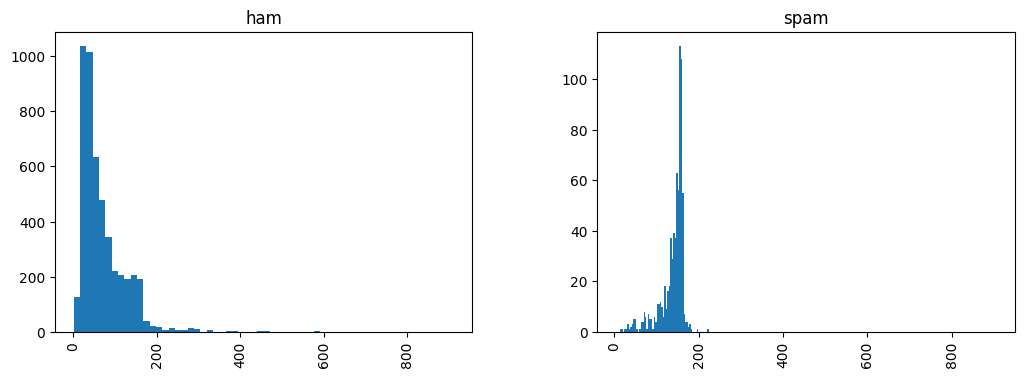

In [ ]:
spam.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950)

Create 2 separate dataframes for only spam messages and only ham messages with:

```
new_df  = old_df[old_df['column'] == x].copy()

```
putting correct names to new_df, old_df, column, x


In [ ]:
new_spam = spam[spam['label'] == 'spam'].copy()

In [ ]:
new_spam.head(6)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1,148
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,1,136
12,spam,URGENT! You have won a 1 week FREE membership ...,NaN,NaN,NaN,1,156


In [ ]:
new_ham = spam[spam['label'] == 'ham'].copy()

In [ ]:
new_ham.head(6)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,0,160


Use ready function from library wordcloud to see graphs for spam and ham



```
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()
```
and apply it to the two df created by yourself with:



```
show_wordcloud(your_df, "title")
```




In [ ]:
def show_wordcloud(new_spam, Spam_wordcloud):
    text = ' '.join(new_spam['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(Spam_wordcloud, fontsize=20 )
    plt.show()

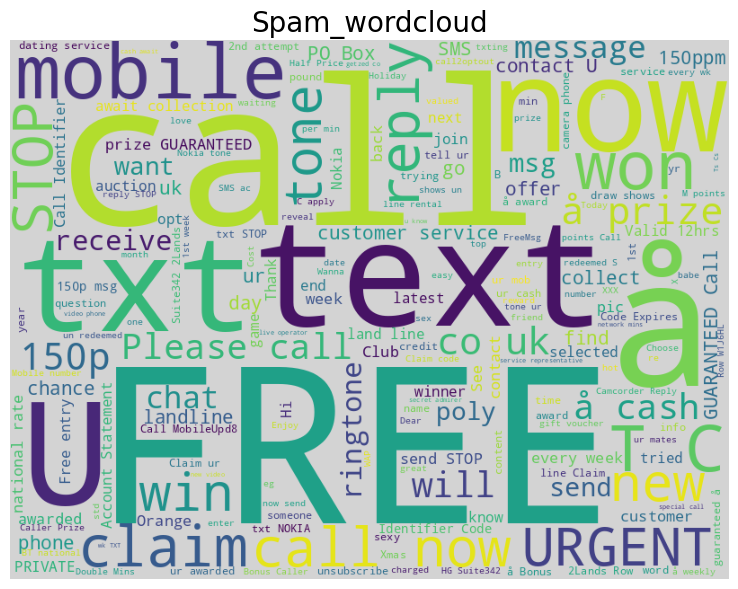

In [ ]:
show_wordcloud(new_spam, "Spam_wordcloud")

In [ ]:
def show_wordcloud(new_ham, Ham_wordcloud):
    text = ' '.join(new_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(Ham_wordcloud, fontsize=20 )
    plt.show()

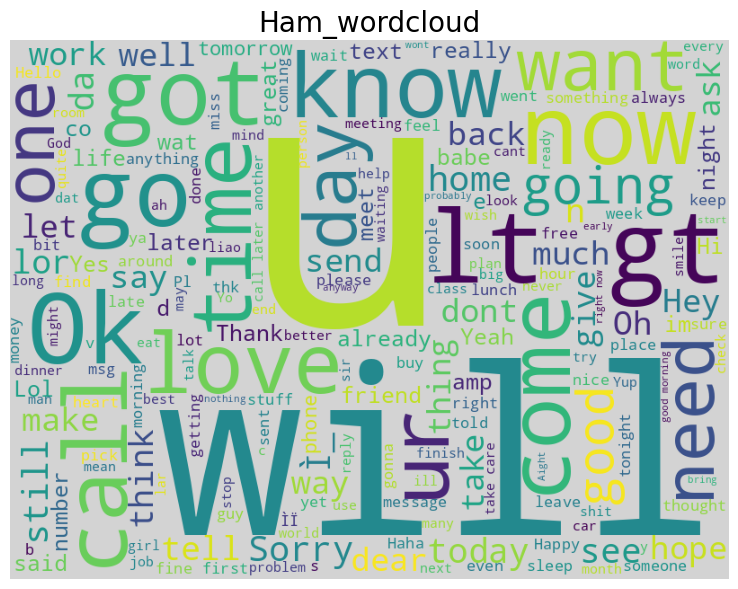

In [ ]:
show_wordcloud(new_ham, "Ham_wordcloud")

###Preprocessing

Basic preprocessing for common NLP tasks includes converting text to lowercase and removing punctuation and stopwords.
Further steps, especially for text classification tasks, are:

Tokenization
Vectorization and

*   Tokenization
*   Vectorization
*   TF-IDF weighting

Lets apply these approaches on the SMS messages.

####Remove Punctuation and Stopwords

Punctuation

*   Punctuation


We use the punctuation list from the string library:



In [ ]:
#run code
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'



*   Stopwords

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text,
and which may be removed to avoid them being construed as signal for prediction.
Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

Due to the known issues in the ’english’ stop word list of sklearn, we use the stopwords from NLTK:



In [ ]:
#run code
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

With the above lists for punctuation characters and stop words, we define a function to remove these from the text
This function also converts all text to lowercase



```
def remove_punctuation_and_stopwords(sms):

    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()

    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]

    return sms_no_punctuation_no_stopwords
```



In [ ]:
def remove_punctuation_and_stopwords(sms):

    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()

    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]

    return sms_no_punctuation_no_stopwords

Apply this function to the text column with .apply(function_name)

and check data head

In [ ]:
spam['text'].apply(remove_punctuation_and_stopwords).head(5)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

####Top 30 words in ham and spam messages
Collections: Counter


```
from collections import Counter
```



In [ ]:
from collections import Counter

First apply remove_punctuation_and_stopwords on column "text" in your two dataframes for ham and spam with:



```
df.loc[:, 'text'] = df['text'].apply(your_function)

```
and create the 2 lists with from the text column, name them as words_data_ham and words_data_spam subsequently with



```
your_list = df['text'].tolist()
```



In [ ]:
new_spam.loc[:, 'text'] = spam['text'].apply(remove_punctuation_and_stopwords)

In [ ]:
new_ham.loc[:, 'text'] = spam['text'].apply(remove_punctuation_and_stopwords)

In [ ]:
words_data_ham = new_ham['text'].tolist()

In [ ]:
words_data_spam = new_spam['text'].tolist()

In [ ]:
#run the code:

list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [ ]:
#run the code:

list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [ ]:
#create words counter by running this code, it will select the most common 30 words:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
ham_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
spam_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

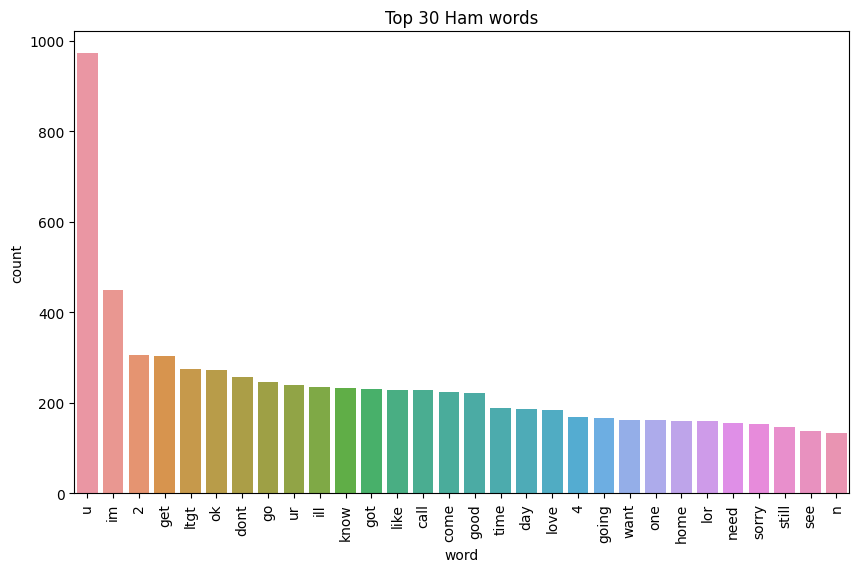

In [ ]:
# run to see the barplot for ham:

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

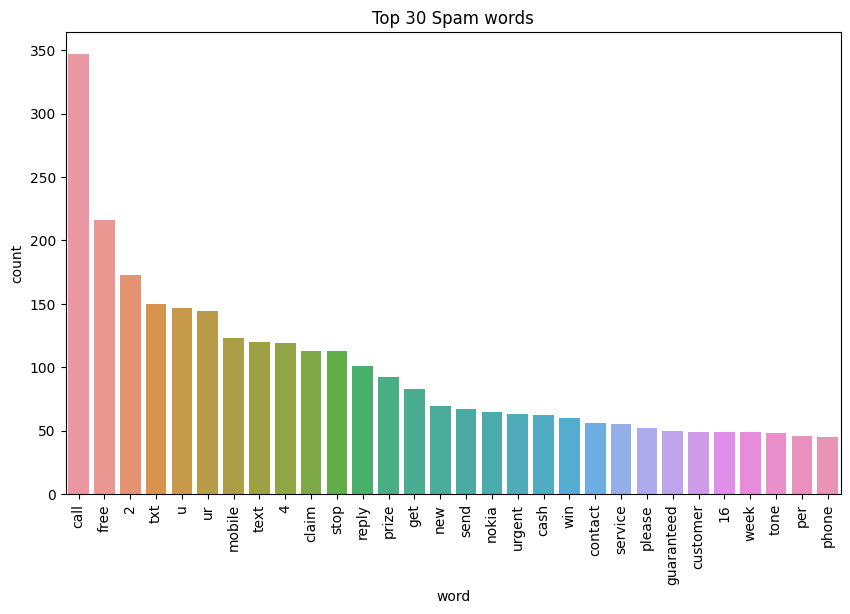

In [ ]:
# run to see the barplot for spam:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

###Bag of words with CountVectorizer

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

scikit-learn provides utilities for the most common ways to extract numerical features such as:



*   Tokenization

tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
*   Vectorization

counting the occurrences of tokens in each document


*   TF-IDF

normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.
*   Bag of Words

In this scheme, features and samples are defined as follows: each individual token occurrence frequency (normalized or not) is treated as a feature.
the vector of all the token frequencies for a given document is considered a multivariate sample.
A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
We call vectorization the general process of turning a collection of text documents into numerical feature vectors.
This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation.
Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.





####apply the CountVectorizer from sklearn as BOW model



```
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(df['text'])

print(len(bow_transformer.vocabulary_))
```

How many unique words are in vocabulary?

In [ ]:
#Counting unique spam words

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(new_spam['text'])

print(len(bow_transformer.vocabulary_))

628


In [ ]:
#Counting unique ham words

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(new_ham['text'])

print(len(bow_transformer.vocabulary_))

4483


Lets look at some vectorization examples for spam and ham messages

See how transformed 8 sentence in your text:

```
sample_spam = df['text'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)
```



In [ ]:
#Vectorising spam

sample_spam = new_spam['text'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'å£900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours']



Do the same exercise for 4 sentence on ham:

In [ ]:
#Vectorising ham

sample_ham = new_ham['text'][4]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']
  (0, 2412)	1


####Applying bow_transformer on all messages



```
bow_data = bow_transformer.transform(dF['text'])
```
Also check bow_data shape and



```
bow_data.nnz
```




In [ ]:
bow_data = bow_transformer.transform(spam['text'])

In [ ]:
bow_data.shape

(5572, 4483)

In [ ]:
bow_data.nnz

4470

###Term frequency inverse document frequency - TFIDF

Occurrence count is a good start but there is an issue: longer documents will have higher average count values
than shorter documents, even though they might talk about the same topics.
To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document
by the total number of words in the document: these new features are called tf for Term Frequencies.
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are
therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

In [ ]:
# To apply TfidfTransformer from sklearn run below code:


from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)

In [ ]:
# to apply on bow sample ham data run:

tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 2412)	1.0


do the same with bow_sample_spam data:

In [ ]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

And on entire bow_data and name it as data_tfidf:

In [ ]:
data_tfidf = tfidf_transformer.transform(bow_data)

Now check this matrix shape with:



```
np.shape(data_tfidf)
```



In [ ]:
np.shape(data_tfidf)

(5572, 4483)

As your data is transformed ! You can now proceed with train - test split and apply ML algorithms !

###train test split

Split your data_tfidf matrix:



```
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, df["spam"], test_size=0.3, random_state=5)
```



In [ ]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, spam["spam"], test_size=0.3, random_state=5)

###ML models
####Naive Bayes Classifier

In [ ]:
#run to create matrices:

data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [ ]:
#MNB Model using only TFIDF matrix:

spam_detect_model = MultinomialNB().fit(data_tfidf_train, label_train)

In [ ]:
# use your ready function to check accuracy on the test set:

pred_test_MNB = spam_detect_model.predict(data_tfidf_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_MNB)

0.8761961722488039


####min-max scaler

check if application of min-max scaler will improve your model performace:

In [ ]:
#run:
scaler = MinMaxScaler()
data_tfidf_train_sc = scaler.fit_transform(data_tfidf_train)
data_tfidf_test_sc  = scaler.transform(data_tfidf_test)

and check your model accuracy now:

In [ ]:
#run:

spam_detect_model_minmax = MultinomialNB().fit(data_tfidf_train_sc, label_train)
pred_test_MNB = spam_detect_model_minmax.predict(data_tfidf_test_sc)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_MNB)

0.8761961722488039


####KNN - second ML model



In [ ]:
#run to check 3 different KNN models (with different numer of neighbours) and apply 5-folds validation:

parameters_KNN = {'n_neighbors': (10,15,17), }

grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(data_tfidf_train, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (10, 15, 17)}, verbose=1)

In [ ]:
# run check which model was performing best and what was the accuracy for it:

print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

{'n_neighbors': 17}
0.8856410256410256


Now check performances of KNN models with following numbers of neighbours:
6,8,10

In [ ]:
parameters_KNN = {'n_neighbors': (6,8,10), }

grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(data_tfidf_train, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (6, 8, 10)}, verbose=1)

you can try to apply different classification models by yoursel, eg: GridSearchCV, GradientBoostingClassifier, XGBoost Classifier

#### COMPARISON OF RESULTS

you need to check which model was the best with confusion matrix.

In [ ]:
#run to get approriate libraries

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [ ]:
#run the function for confusion matrix:

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
                cmap="Blues", square=True, cbar=False)
    #
    plt.ylabel('true label')
    plt.xlabel('predicted label')

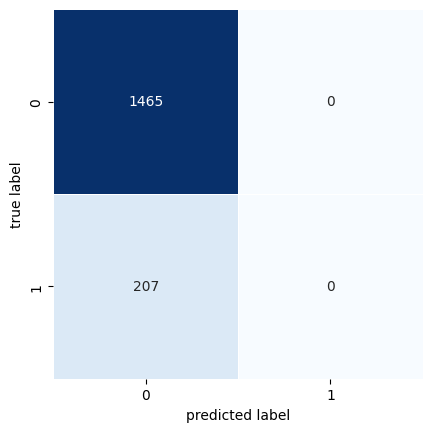

In [ ]:
#and eg applying on MNB:
plot_confusion_matrix(label_test, pred_test_MNB)

what are the parameters? REMEMBER THAT:

**classification accuracy = correct predictions / total predictions = (TP + TN) / (TP + TN + FP + FN)**

 how this model performed? try to do the same for KNN and if you used another models:

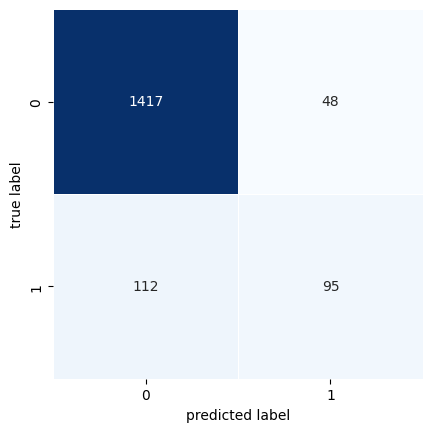

In [ ]:
label_pred_KNN = grid_KNN.best_estimator_.predict(data_tfidf_test)
plot_confusion_matrix(label_test, label_pred_KNN)

To apply accuracy on MNB model:



```
acc_mnb = accuracy_score(label_test, pred_test_MNB)
```
print results and check for KNN




In [ ]:
acc_mnb = accuracy_score(label_test, pred_test_MNB)

Similarly you can check:



```
precision_score(label_test, pred_test_MNB)
recall_score(label_test, pred_test_MNB)
f1_score(label_test, pred_test_MNB)
```

or get entire classification report:



```
classification_report(label_test, pred_test_MNB)
```

to the same for KNN as well



In [ ]:
precision_score(label_test, pred_test_MNB)
recall_score(label_test, pred_test_MNB)
f1_score(label_test, pred_test_MNB)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
classification_report(label_test, pred_test_MNB)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93      1465\n           1       0.00      0.00      0.00       207\n\n    accuracy                           0.88      1672\n   macro avg       0.44      0.50      0.47      1672\nweighted avg       0.77      0.88      0.82      1672\n'

In [ ]:
print(precision_score(label_test, pred_test_MNB))
print(recall_score(label_test, pred_test_MNB))
print(f1_score(label_test, pred_test_MNB))

0.0
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
testing = pd.read_csv('/content/ML_Final.csv')

In [ ]:
testing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
